In [33]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from collections import Counter
from sklearn.base import clone

%matplotlib inline

In [34]:
with open('y_correct.pickle','rb') as to_read:
    y = pickle.load(to_read)

In [35]:
with open('X_all_features.pickle','rb') as to_read:
    X = pickle.load(to_read)

In [36]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38181 entries, 0 to 38180
Data columns (total 45 columns):
prior_ICU_hours                                 38181 non-null float64
age_years                                       38181 non-null float64
marital_status_bin_MARRIED                      38181 non-null float64
marital_status_bin_SINGLE                       38181 non-null float64
religion_2_1                                    38181 non-null float64
ethnicity_ASIAN                                 38181 non-null float64
ethnicity_BLACK/AFRICAN AMERICAN                38181 non-null float64
ethnicity_HISPANIC/LATINO                       38181 non-null float64
ethnicity_WHITE                                 38181 non-null float64
language_bin_0                                  38181 non-null float64
admission_type_EMERGENCY                        38181 non-null float64
admission_type_URGENT                           38181 non-null float64
admission_location_CLINIC REFERRAL/PREM

In [37]:
y.value_counts()

0.0    31754
1.0     6427
Name: CLABSI, dtype: int64

## Train/Test Split 

In [38]:
X_trainVal, X_test, y_trainVal, y_test = train_test_split(X, y, test_size=0.2,random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_trainVal, y_trainVal, test_size=0.2,random_state=0)

In [39]:
print("total %: " + str(6427/31754))
print("trainVal %: " + str(5112/25432))
print("train %: " + str(4062/20373))
print("test %: " + str(1315/6322))

total %: 0.20239969767588337
trainVal %: 0.2010066058508965
train %: 0.1993815343837432
test %: 0.2080037962670041


## Drop Columns - Feature Importance

**Note: Resampling converts X to numpy.ndarray object -- will test features on original imbalanced data**

In [40]:
# Initalize a base Random Forest 
rf_model = RandomForestClassifier(n_estimators=100,oob_score=True)
rf_model.fit(X_train, y_train)
predictions = rf_model.predict(X_val)
print(classification_report(y_val,predictions))

              precision    recall  f1-score   support

         0.0       0.92      0.99      0.96      5098
         1.0       0.94      0.58      0.72      1011

   micro avg       0.92      0.92      0.92      6109
   macro avg       0.93      0.79      0.84      6109
weighted avg       0.93      0.92      0.92      6109



In [41]:
baseline = rf_model.oob_score_
baseline

0.9263351749539595

In [42]:
lst_cols = list(X_train.columns)
lst_cols

['prior_ICU_hours',
 'age_years',
 'marital_status_bin_MARRIED',
 'marital_status_bin_SINGLE',
 'religion_2_1',
 'ethnicity_ASIAN',
 'ethnicity_BLACK/AFRICAN AMERICAN',
 'ethnicity_HISPANIC/LATINO',
 'ethnicity_WHITE',
 'language_bin_0',
 'admission_type_EMERGENCY',
 'admission_type_URGENT',
 'admission_location_CLINIC REFERRAL/PREMATURE',
 'admission_location_EMERGENCY ROOM ADMIT',
 'admission_location_PHYS REFERRAL/NORMAL DELI',
 'admission_location_TRANSFER FROM HOSP/EXTRAM',
 'first_careunit_CCU',
 'first_careunit_CSRU',
 'first_careunit_MICU',
 'first_careunit_SICU',
 'insurance_Medicaid',
 'insurance_Medicare',
 'insurance_Private',
 'insurance_Self Pay',
 'gender_F',
 'No diagnosis',
 'blood',
 'circulatory',
 'congenital',
 'digestive',
 'endocrine',
 'external injury',
 'genitourinary',
 'infectious',
 'injury and poisoning',
 'mental',
 'misc',
 'muscular',
 'neoplasms',
 'nervous',
 'perinatal',
 'pregnancy',
 'respiratory',
 'skin',
 'special considerations']

In [43]:
def dropcol_importances(model, X, y):
    model.random_state = 100
    model.fit(X, y)
    baseline = model.oob_score_
    print(baseline)
    imp = []
    for col in lst_cols:
        X2 = X.copy()
        model_ = clone(model)
        model_.random_state = 100
        model_.fit((X2.drop(col, axis=1)), y)
        o = model_.oob_score_
        imp.append(np.absolute(baseline - o))    
    imp = np.array(imp)
    I5 = pd.DataFrame(
            data={'Feature':X.columns,
                  'Absolute Importance':imp})
    #I = I.set_index('Feature')
    I5 = I5.sort_values('Absolute Importance', ascending=False)
    with open ("I5_df.pickle", 'wb') as to_write:
        pickle.dump(I4, to_write)
    
    plt.figure(figsize=(9,3))
    sns.set_context('poster')
    sns.barplot(x='Feature',y='Absolute Importance',data=I5,color='darkblue')
    plt.tick_params(axis='x',which='both',right = False, bottom=False,top=False,labelbottom=False) 
    return I5

0.9269081235932065


,Feature,Absolute Importance
34,injury and poisoning,0.008103
33,infectious,0.004870
31,external injury,0.004584
36,misc,0.002496
43,skin,0.002169
38,neoplasms,0.001964
29,digestive,0.001883
19,first_careunit_SICU,0.001801
35,mental,0.001719
0,prior_ICU_hours,0.001596


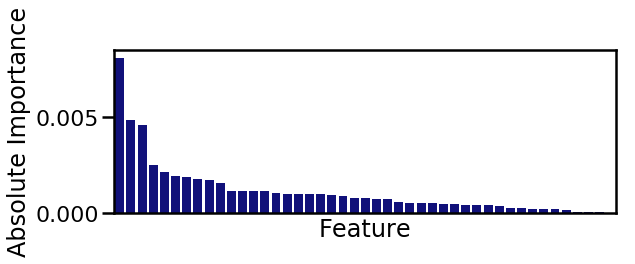

In [44]:
dropcol_importances(rf_model,X_train,y_train)

In [47]:
with open('I5_df.pickle','rb') as to_read:
    I5 = pickle.load(to_read)
I5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 34 to 3
Data columns (total 2 columns):
Feature                45 non-null object
Absolute Importance    45 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.1+ KB


In [48]:
I5.head(6)

,Feature,Absolute Importance
34,injury and poisoning,0.008103
33,infectious,0.004870
31,external injury,0.004584
36,misc,0.002496
43,skin,0.002169
38,neoplasms,0.001964


In [49]:
clrs = ['darkblue' if x > 0.004 else 'lightgray' for x in I4['Absolute Importance']]
clrs

['darkblue',
 'darkblue',
 'darkblue',
 'lightgray',
 'lightgray',
 'lightgray',
 'lightgray',
 'lightgray',
 'lightgray',
 'lightgray',
 'lightgray',
 'lightgray',
 'lightgray',
 'lightgray',
 'lightgray',
 'lightgray',
 'lightgray',
 'lightgray',
 'lightgray',
 'lightgray',
 'lightgray',
 'lightgray',
 'lightgray',
 'lightgray',
 'lightgray',
 'lightgray',
 'lightgray',
 'lightgray',
 'lightgray',
 'lightgray',
 'lightgray',
 'lightgray',
 'lightgray',
 'lightgray',
 'lightgray',
 'lightgray',
 'lightgray',
 'lightgray',
 'lightgray',
 'lightgray',
 'lightgray',
 'lightgray',
 'lightgray',
 'lightgray',
 'lightgray']

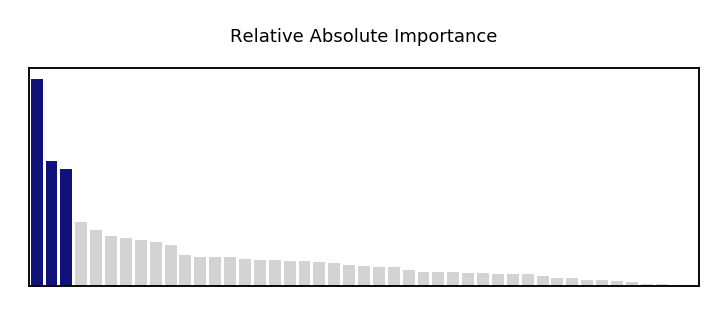

In [50]:
sns.set_context('talk')

plt.figure(figsize=(12,4))
clrs = ['darkblue' if x > .003 else 'lightgray' for x in I4['Absolute Importance']]
sns.barplot(x='Feature',y='Absolute Importance',data=I4,palette=clrs)
plt.title("\n" + "Relative Absolute Importance" + "\n")
plt.xlabel(' ')
plt.ylabel(' ')
plt.tick_params(left=False,bottom=False,top=False,labelbottom=False, labelleft=False)
plt.savefig('Absolute_Importance_grayBlue.jpeg', dpi=300,transparent=True)
